# **Libraries installation**

In [1]:
!pip install -q langchain-core langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.6 MB/s eta 0:00:00


# **LLM Actions and Structure Output**

In [2]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

In [20]:
messages = [AIMessage(content="So you said you were reaching ocean mammals ?", name="Assistant")]
messages.append(HumanMessage(content="Yes that's right.", name="Anas"))
messages.append(AIMessage(content="Great, What you would like to learn about.", name="Assistant"))
messages.append(HumanMessage(content="I want to learn about the best place to see orcus is US.", name="Anas"))

In [21]:
for msg in messages:
  msg.pretty_print()

================================== Ai Message ==================================
Name: Assistant

So you said you were reaching ocean mammals ?
================================ Human Message =================================
Name: Anas

Yes that's right.
================================== Ai Message ==================================
Name: Assistant

Great, What you would like to learn about.
================================ Human Message =================================
Name: Anas

I want to learn about the best place to see orcus is US.


In [9]:
import os
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [10]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [14]:
# Invoking
simple_call = model.invoke("Hi")
simple_call.pretty_print()

================================== Ai Message ==================================

Hi there! How can I help you today?


In [18]:
simple_message = [HumanMessage(content="What is your name ?", name="Anas")]
result = model.invoke(simple_message)
result.pretty_print()

================================== Ai Message ==================================

I am a large language model, trained by Google.


In [19]:
system_human_message = [
    SystemMessage(content="You are a helpful assistant. Your name is Google baba."),
    HumanMessage(content="What is your name?")
]
result = model.invoke(system_human_message)
result.pretty_print()

================================== Ai Message ==================================

My name is Google baba.


In [23]:
context_call = model.invoke(messages)
context_call

AIMessage(content='Okay! If you\'re looking for the best places in the US to see orcas (killer whales), you have a few excellent options, primarily concentrated in the Pacific Northwest:\n\n**1. San Juan Islands, Washington State:**\n\n*   **Why it\'s great:** This is arguably the *best* place in the US to see orcas. The Southern Resident orca population frequents these waters, especially during the summer months (roughly May-September).\n*   **How to see them:**\n    *   **Whale watching tours:** Numerous reputable tour operators run daily excursions from towns like Friday Harbor (San Juan Island), Anacortes, and Bellingham. These tours use hydrophones to listen for orca calls and follow responsible viewing guidelines.\n    *   **Land-based viewing:** Lime Kiln State Park (also known as "Whale Watch Park") on San Juan Island is a prime spot for land-based viewing. You might need binoculars, but the views are stunning, and you can often hear the orcas with a hydrophone.\n*   **Things t

# **Tools**

**Setupping**

In [24]:
%%capture --no-stderr
%pip install --quiet -U langchain-google-genai langchain_core langgraph

In [25]:
import os
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [26]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

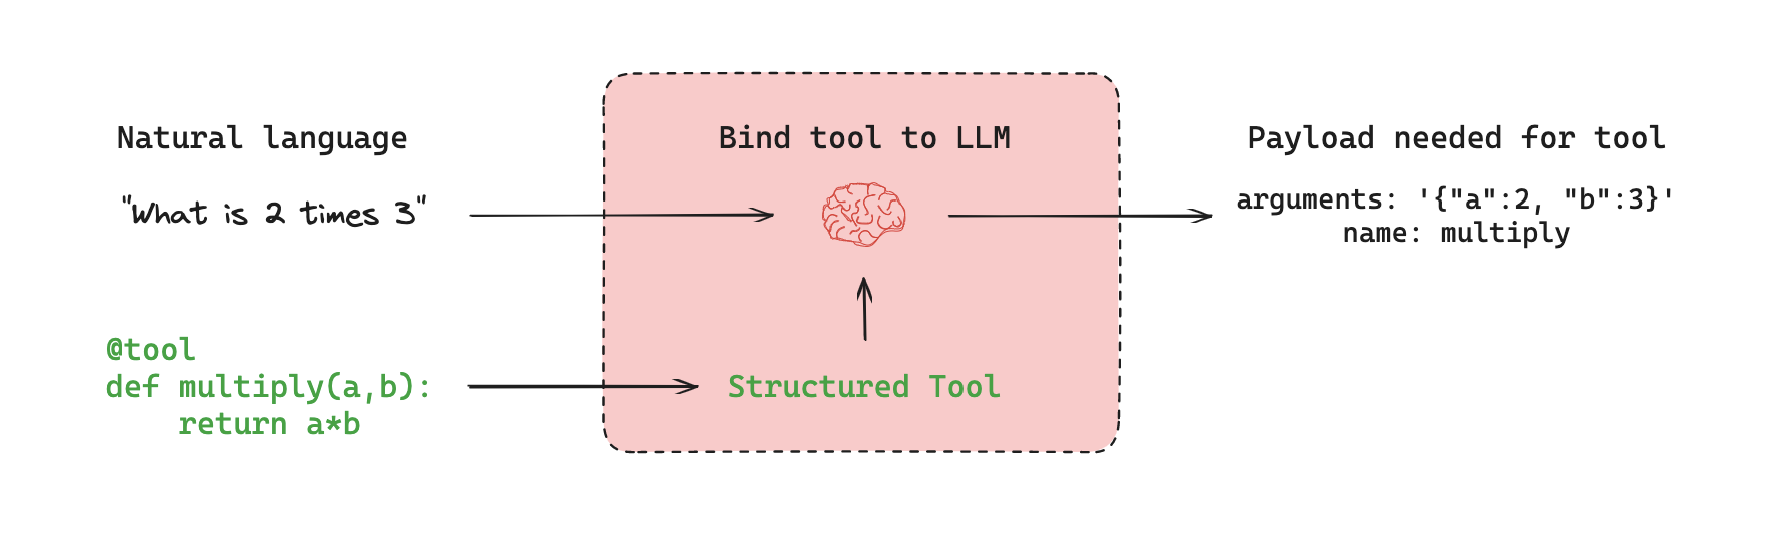

**Tool Calling**

In [27]:
print("\n\n\n", model, "\n\n\n")




 model='models/gemini-2.0-flash' google_api_key=SecretStr('**********') client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x796a5b4e4950> default_metadata=() 





In [28]:
# Defining a function (tool) to deposit money
def deposit_money(name: str, amount: int, account_number: int) -> dict:
  """
  Deposit money in bank account

  Args:
    name: Name of the person
    amount: Amount to be deposited
    acount_number: Account Number of bank

  Returns:
    status (dict): Status of the deposit
  """
  # Business logic to deposit money
  # -----------------
  return {"status": f"Congratulation {name}: Successfully deposited {amount} Ruppee in {account_number}"}

In [29]:
# binding tool with model
llm_with_tool = model.bind_tools([deposit_money])

In [30]:
llm_with_tool

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-2.0-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x796a5b4e4950>, default_metadata=()), kwargs={'tools': [{'function_declarations': [{'name': 'deposit_money', 'description': 'Deposit money in bank account\n\nArgs:\n  name: Name of the person\n  amount: Amount to be deposited\n  acount_number: Account Number of bank\n\nReturns:\n  status (dict): Status of the deposit', 'parameters': {'type_': 6, 'description': 'Deposit money in bank account\n\nArgs:\n  name: Name of the person\n  amount: Amount to be deposited\n  acount_number: Account Number of bank\n\nReturns:\n  status (dict): Status of the deposit', 'properties': {'account_number': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'amount': {'type_': 3, 'fo

In [32]:
# Invoke: Simple model
model.invoke([
    HumanMessage(content="Hello Gemini, how are you ?")
])

AIMessage(content="I am doing well, thank you for asking! As a large language model, I don't experience emotions or feelings like humans do, but I am functioning optimally and ready to assist you. How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-afefe670-3982-437d-8b41-de27e426b48c-0', usage_metadata={'input_tokens': 7, 'output_tokens': 47, 'total_tokens': 54, 'input_token_details': {'cache_read': 0}})

In [33]:
# Invoke: Simple model
model.invoke([
    HumanMessage(content="Deposit 2000 ruppess in Anas account. His account number is 123456")
])

AIMessage(content='Okay, I can help you with that. While I can\'t directly deposit money (I\'m just an AI), I can provide you with the information you\'ll need to make the deposit.\n\nYou want to deposit 2000 Rupees into Anas\' account. The account number is 123456.\n\nTo actually make the deposit, you\'ll need to use one of the following methods:\n\n*   **Bank Transfer:** If you have online banking, you can likely transfer the money directly to Anas\' account. You will need the bank name and possibly the branch code in addition to the account number.\n\n*   **Visiting a Bank Branch:** You can go to a branch of Anas\' bank (if you know which bank it is) and deposit the money over the counter. You\'ll need the account number.\n\n*   **UPI (Unified Payments Interface):** If Anas has a UPI ID linked to this account, you can use apps like Google Pay, PhonePe, or Paytm to transfer the money.\n\n*   **Other Payment Apps:** Some other mobile payment apps may also allow you to transfer money d

In [34]:
# Invoke: Model with tool
llm_with_tool.invoke([
    HumanMessage(content="Hello Gemini, how are you ?")
])

AIMessage(content='I am doing well, thank you for asking. How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-65a60144-e46f-46d5-9fe4-2aa2c5e595bf-0', usage_metadata={'input_tokens': 116, 'output_tokens': 18, 'total_tokens': 134, 'input_token_details': {'cache_read': 0}})

In [35]:
# Invoke: Model with tool
llm_with_tool.invoke([
    HumanMessage(content="Deposit 2000 ruppess in Anas account. His account number is 123456")
])

AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"account_number": 123456.0, "amount": 2000.0, "name": "Anas"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-25a270a8-4625-4d75-9aa4-a6e5a0e9dc0c-0', tool_calls=[{'name': 'deposit_money', 'args': {'account_number': 123456.0, 'amount': 2000.0, 'name': 'Anas'}, 'id': '817da8e9-713d-492a-9797-a6b659e22b54', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 9, 'total_tokens': 142, 'input_token_details': {'cache_read': 0}})

**Building Graph**

In [36]:
from langgraph.graph import StateGraph, START, END

In [42]:
# Defining our state
from typing_extensions import TypedDict
class State(TypedDict):
  messages: list

In [43]:
# Defining node for LLM with tool call
def call_model_with_tool(state: State):
  messages = state["messages"]
  response = llm_with_tool.invoke(messages)
  return {"messages": [response]}

In [45]:
# Building graph
builder = StateGraph(State)

# Add Node
builder.add_node("call_model_with_tool", call_model_with_tool)

# Add Edges
builder.add_edge(START, "call_model_with_tool")
builder.add_edge("call_model_with_tool", END)

# Compile
graph = builder.compile()

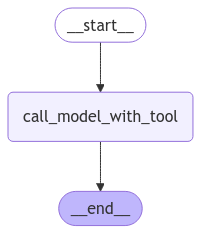

In [46]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [48]:
# Invoke
graph.invoke({"messages": "Hello, How are you ?"})

{'messages': [AIMessage(content='I am doing well, thank you for asking. How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-b050a4d2-a1ac-4af6-be22-cb74d21bc26e-0', usage_metadata={'input_tokens': 115, 'output_tokens': 18, 'total_tokens': 133, 'input_token_details': {'cache_read': 0}})]}

In [49]:
# Invoke
graph.invoke({"messages": "Deposit 200 ruppee in Anas account and his account number is 12345"})

{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"account_number": 12345.0, "amount": 200.0, "name": "Anas"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-cf72765a-7b8a-4d39-806c-2f026281ccf8-0', tool_calls=[{'name': 'deposit_money', 'args': {'account_number': 12345.0, 'amount': 200.0, 'name': 'Anas'}, 'id': 'c48220c3-735c-450b-bd27-f2cbd119f2f8', 'type': 'tool_call'}], usage_metadata={'input_tokens': 130, 'output_tokens': 9, 'total_tokens': 139, 'input_token_details': {'cache_read': 0}})]}